In [1]:
import os
import torch.backends.cudnn as cudnn
import torch
import yaml
from utils import AttrDict
import pandas as pd
from train import train
from data_prepare import prepare_data

#### Install packages

In [2]:
# !pip install torch
# !pip install natsort
# !pip install torchvision
# !pip install pyyaml
# !pip install pandas
# !pip install nltk

In [3]:
cudnn.benchmark = True
cudnn.deterministic = False
torch.cuda.is_available()

True

#### Training

In [4]:
# image_path = raw_data_path = os.path.join('raw_data','train_images_30k')
# prepare_data(image_path)

In [5]:
def get_config(file_path):
    with open(file_path, 'r', encoding="utf8") as stream:
        opt = yaml.safe_load(stream)
    opt = AttrDict(opt)
    if opt.lang_char == 'None':
        pass
        # characters = ''
        # for data in opt['select_data'].split('-'):
        #     csv_path = os.path.join(opt['train_data'], 'training' ,data, 'labels.csv')
        #     df = pd.read_csv(csv_path, sep='^([^,]+),', engine='python', usecols=['filename', 'words'], keep_default_na=False)
        #     all_char = ''.join(df['words'])
        #     characters += ''.join(set(all_char))
        # characters = sorted(set(characters))
        # opt.character= ''.join(characters)
        # print('char: ',opt.character)
    else:
        characters = ''
        for data in opt['select_data'].split('-'):
            csv_path = os.path.join(opt['train_data'], 'training' ,data, 'labels.csv')
            df = pd.read_csv(csv_path, sep='^([^,]+),', engine='python', usecols=['filename', 'words'], keep_default_na=False)
            all_char = ''.join(df['words'])
            characters += ''.join(set(all_char))
        characters = sorted(set(characters))
        opt.character= ''.join(characters)
        print(f'experiment: {opt.experiment_name}')
        print('char in train_set:',opt.character)
        opt.character = opt.lang_char
    os.makedirs(f'./saved_models/{opt.experiment_name}', exist_ok=True)
    return opt

albe to config in config_files/*.yaml
check list: \
&emsp;lang_char \
&emsp;experiment_name \
&emsp;num_iter \
&emsp;saved_model \
&emsp;lr \
&emsp;model architecture

In [6]:
opt = get_config("config_files/crnn_30k.yaml")
train(opt, amp=False)

experiment: crnn_30k_lr_25e-2
char in train_set:  !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz|~กขฃคฅฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรฤลฦวศษสหฬอฮฯะัาำิีึืุูเแโใไๅๆ็่้๊๋์ํ๐๑๒๓๔๕๖๗๘๙–‘’
Filtering the images containing characters which are not in opt.character
Filtering the images whose label is longer than opt.batch_max_length
--------------------------------------------------------------------------------
dataset_root: all_data/training
opt.select_data: ['']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_log dataset_root:    all_data/training	 dataset: 
all_data/training/training
sub-directory:	/training	 num samples: 26859
num total samples of : 26859 x 1.0 (total_data_usage_ratio) = 26859
num samples of  per batch: 32 x 1.0 (batch_ratio) = 32
--------------------------------------------------------------------------------
Total_batch_size: 32 = 32
-------------------------------

loss: 0.520: : 77it [00:14,  5.80it/s]

In [ ]:
label_path = [ './saved_models/crnn_30k_lr_25e-2/log_loss_train.txt',
]
loss_list = []
for path in label_path:
    with open(path, encoding='utf8') as file:
        lines = file.readlines()
        for line in lines:
            loss_list.append(float(line.split(' ')[-2]))

ValueError: could not convert string to float: 'experiment_name:'

2000


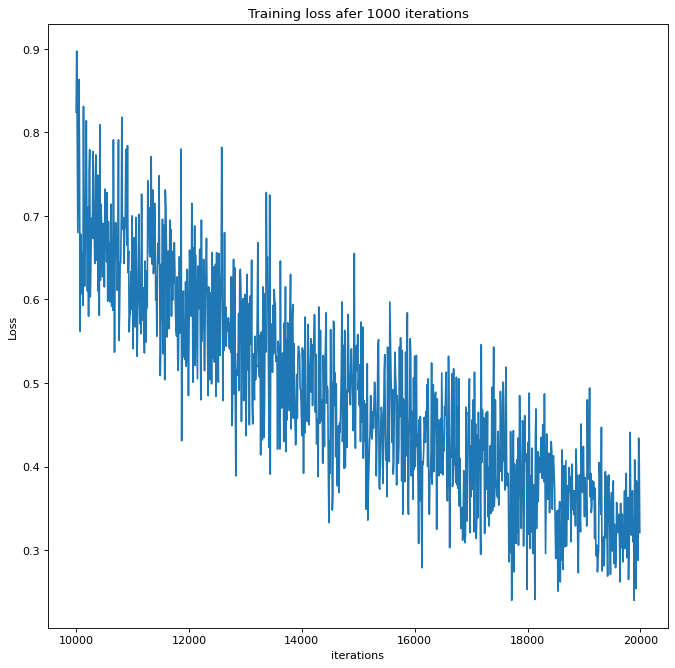

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
print(len(loss_list))
plt.figure(figsize=(10, 10), dpi=80)
start_row = 10000
start = int(start_row /10)
plt.plot(np.arange(len(loss_list[start:]))*10+start_row, loss_list[start:])
plt.title('Training loss afer 1000 iterations')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.show()